<img src="../static/IEEE_logo.png" alt="IEEE" style="width: 300px;"/>

# Diagrama de radiación de una Antena Cilíndrica

###### ![](../static/antena_cilindrica.png) <h6 align="right">__Fuente:__ _Antenas, A. Cardama, L. Jofre, J.M. Rius, S. Blanch, M. Ferrrando_<div>

_Aunque no te lo creas, __con lo que hemos visto hasta ahora eres capaz de hacer grandes cosas__. Vale sí, un dipolo no es gran  Antena, pero si lo hacemos en Python... Echa un vistazo a la figura ¿no está mal, no? algo así intentaremos conseguir al final de esta clase._
![](../static/diagrama.png)

_Como no se trata de aprender (o reaprender) sobre Antenas, te daremos las funciones matemáticas y los pasos a seguir así como la estructura del programa. Tú sólo tienes que preocuparte de programar cada bloque. Puedes leer en detalle todo lo relativo a Antenas en el libro  Antenas de A. Cardama, L. Jofre, J.M. Rius, S. Blanch, M. Ferrrando (Editorial UPC)._

## 1. Importamos paquetes

Lo primero es lo primero, importemos los paquetes:

In [2]:
# Recuerda, utilizaremos arrays y pintaremos gráficas.
import numpy as np
%matplotlib inline
from matplotlib import cm
import matplotlib.pyplot as plt
from ipywidgets import interact
from mpl_toolkits.mplot3d import Axes3D

## 2. Parámetros del problema

Los parámetros del problema son los del siguiente bloque, puedes cambiarlos más adelante:

In [3]:
eps_0 = 8.8541878117e-12
mu_0 = 1.256637061e-6
C = 299792458
eta = 120*np.pi

## 3. Vector de radiación de un dipolo

$$ \overrightarrow{N} = \hat{z} 2 I_m \dfrac{\cos(k H  \cos \theta) - \cos k H}{k \ \sin^2 \theta} $$

In [4]:
def vectorRadiacionDipolo(H, I_m, lamb, theta):
    k=2*np.pi /lamb
    N_z = 2* I_m * ((np.cos(k*H*np.cos(theta))) - np.cos(k*H))/(k*np.sin(theta)**2) 
    return N_z

## 4. Vector Campo Eléctrico

$$
\overrightarrow{E} = \dfrac{-j k \eta_o}{4 \pi} \dfrac{e^{-j k r}}{r} [(\hat{r} \times \overrightarrow{N}) \times \hat{r}]
$$

Como $\overrightarrow{N}$ solo tiene componente $\hat{z}$ al realizar el producto vectorial, $\overrightarrow{E}$ solo tendrá componente $\hat{\theta}$. Por lo tanto, el campo eléctrico radiado sería el siguiente:
$$
\overrightarrow{E} = \dfrac{-j k \eta_o}{4 \pi} \dfrac{e^{-j k r}}{r} \cdot N_z \cdot \sin(\theta) \cdot \hat{\theta}
$$

In [8]:
def vectorCampoElectrico(H, I_m, lamb, theta, r):
    k = 2*np.pi /lamb
    E_theta = - 1j * k * eta * np.exp(-1j*k*r)/(4*np.pi*r) * np.sin(theta) * vectorRadiacionDipolo(H, I_m, lamb, theta)
    return E_theta

## 5. Diagrama de Radiación 2D

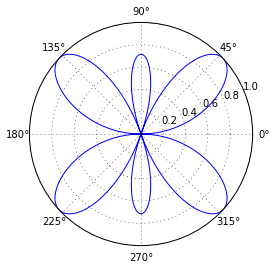

In [10]:
def diagramaRadiacion(H):
    theta = np.linspace(0.001,2*np.pi, 1000)
    E_theta = vectorCampoElectrico(H=H, I_m=1, lamb=1, theta=theta, r=1)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, polar=True)
    #ax.set_theta_zero_location("N")
    ax.plot(theta, np.abs(E_theta)/np.max(np.abs(E_theta)))
    
diagramaRadiacion(0.75)

## 6. Diagrama de Radiación 3D